In [7]:
import sys
sys.path.append('../scripts')  # Appending the path to access the scripts folder
from EDA_functions import * 

In [8]:
# Setup Logging


    # File paths 
train_path = 'C:/Users/Administrator/Desktop/Week 4/Technical Content/Data/train.csv'
test_path = 'C:/Users/Administrator/Desktop/Week 4/Technical Content/Data/test.csv'
store_path = 'C:/Users/Administrator/Desktop/Week 4/Technical Content/Data/store.csv'


    # Load and clean data
train, test = load_data(train_path, test_path, store_path)
train_cleaned = clean_data(train)
test_cleaned = clean_test_data(test)

   


c:\Users\Administrator\Documents\kifiya\Week_4\notebooks\../scripts\EDA_functions.py:39: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)
c:\Users\Administrator\Documents\kifiya\Week_4\notebooks\../scripts\EDA_functions.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
c:\Users\Administrator\Documents\kifiya\Week_4\notebooks\../scripts\EDA_functions.py:63: Fu

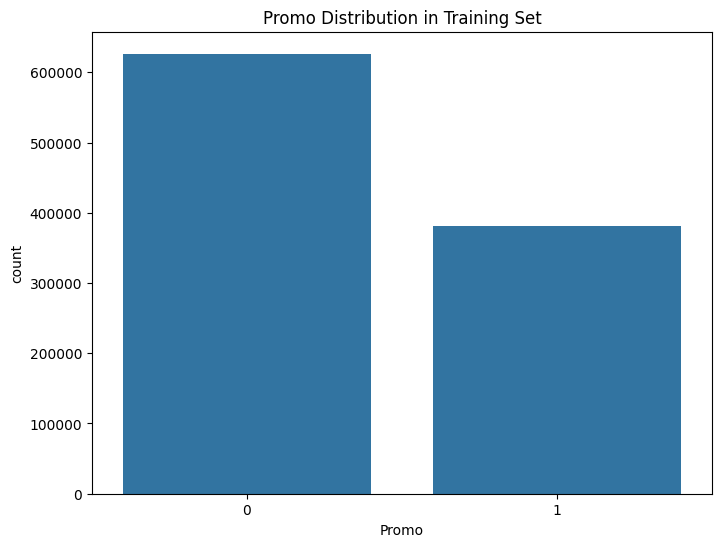

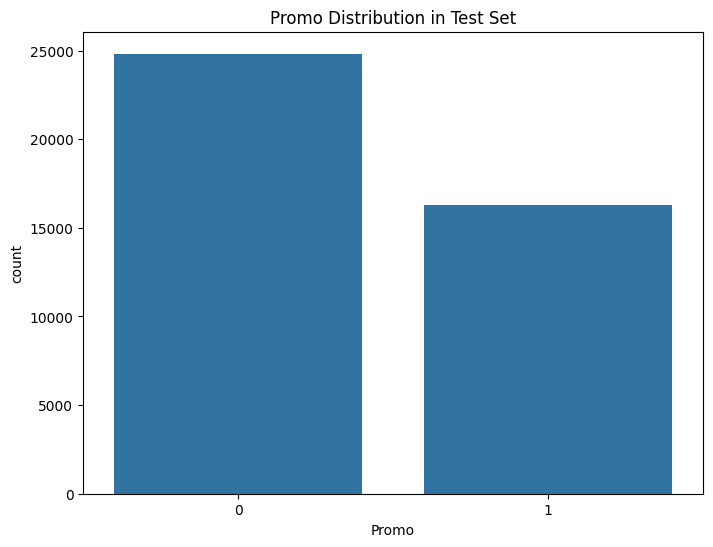

In [9]:
 # Perform EDA
## 1. Check for promo distribution in training and test sets
promo_distribution(train_cleaned, "Training")
promo_distribution(test_cleaned, "Test")

c:\Users\Administrator\Documents\kifiya\Week_4\notebooks\../scripts\EDA_functions.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holiday'] = np.where((df['StateHoliday'] != '0') | (df['SchoolHoliday'] == 1), 'Holiday', 'No Holiday')


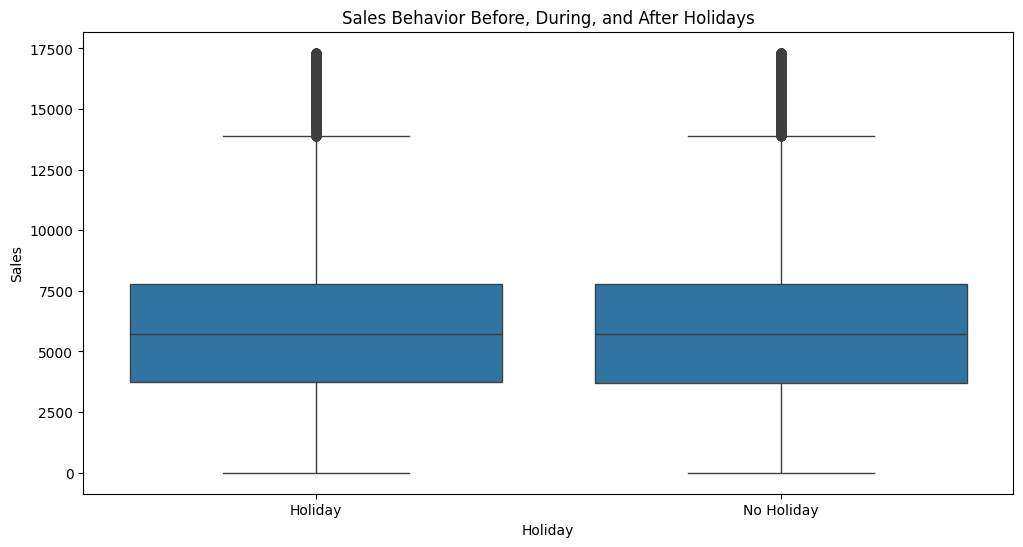

In [10]:
## 2. Sales behavior before, during, and after holidays
# Assuming `StateHoliday` and `SchoolHoliday` indicate holiday periods
sales_holiday_behavior(train_cleaned)
    

c:\Users\Administrator\Documents\kifiya\Week_4\notebooks\../scripts\EDA_functions.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
c:\Users\Administrator\Documents\kifiya\Week_4\notebooks\../scripts\EDA_functions.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month


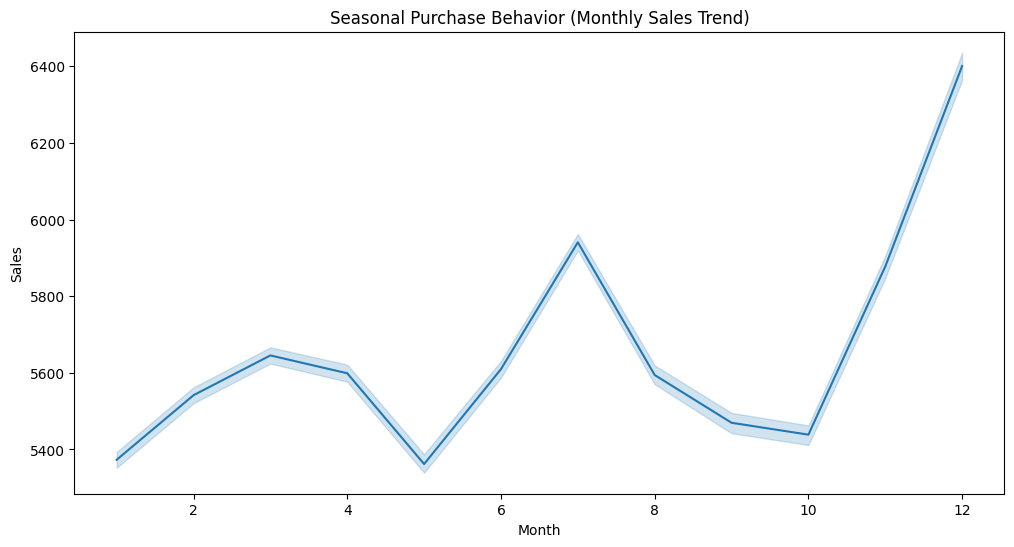

In [11]:
## 3. Seasonal purchase behaviors (e.g., Christmas, Easter)
seasonal_sales_behavior(train_cleaned)
    

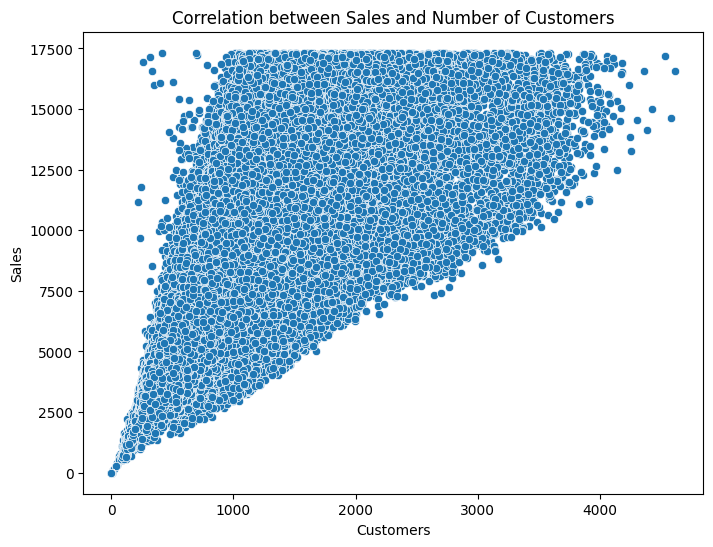

In [12]:
## 4. Correlation between sales and number of customers
sales_customers_correlation(train_cleaned)
    

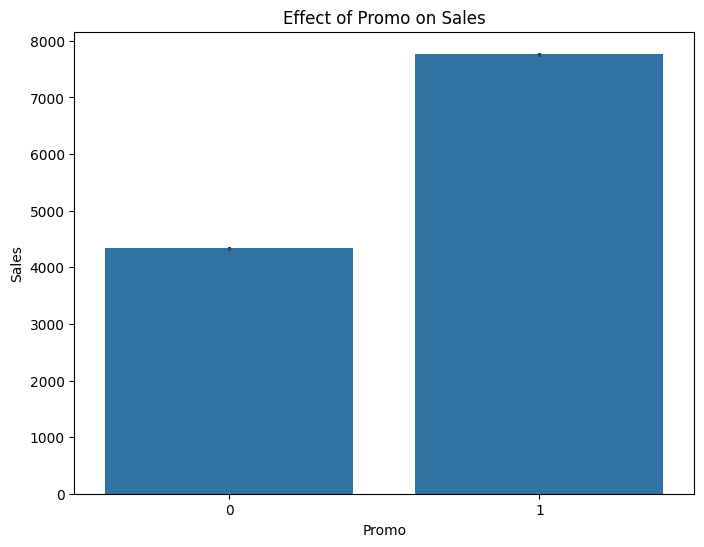

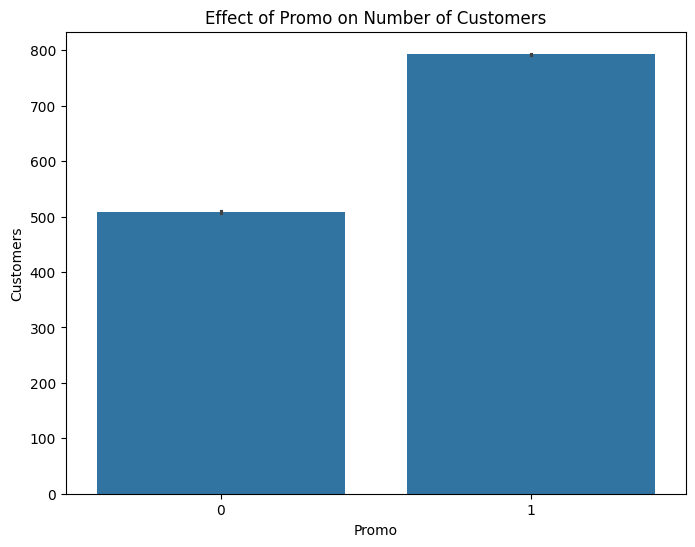

In [13]:
## 5. Promo effect on sales (Are promos attracting more customers?)
promo_effect(train_cleaned)


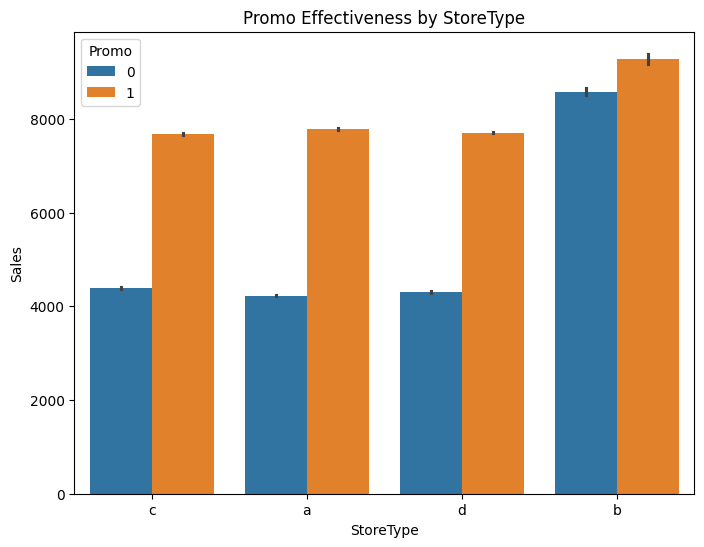

In [14]:
## 6. Deploying promos more effectively (e.g., by StoreType)
store_type_promo_effectiveness(train_cleaned)
   

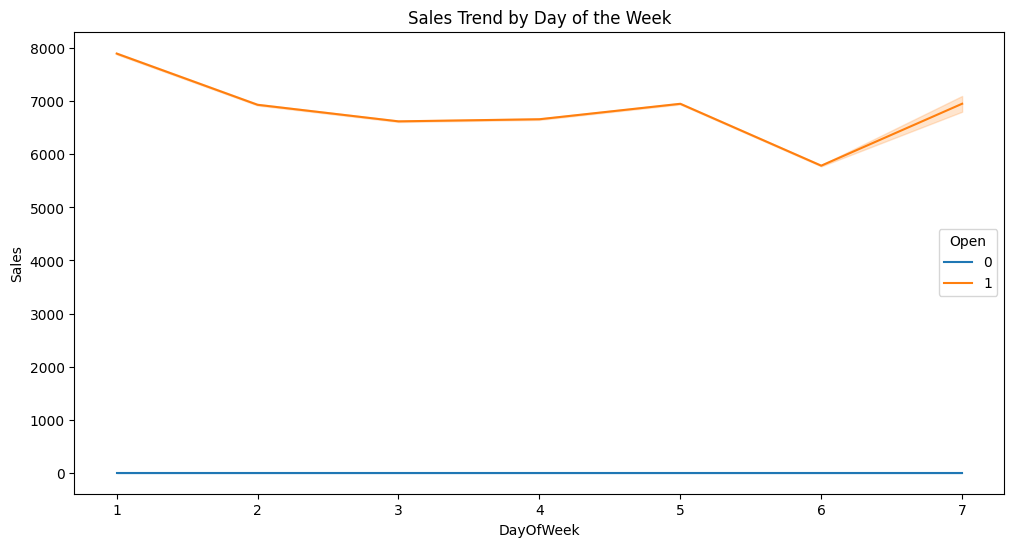

In [15]:
## 7. Trends of customer behavior during store opening and closing times
sales_trend_open(train_cleaned)
   

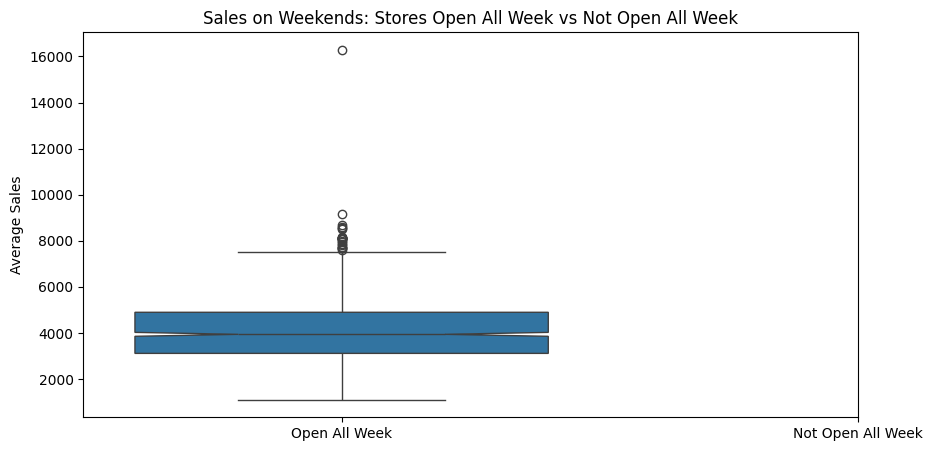

In [16]:
## 8. Stores open all weekdays vs weekend sales
weekend_sales_comparison(train_cleaned)
   

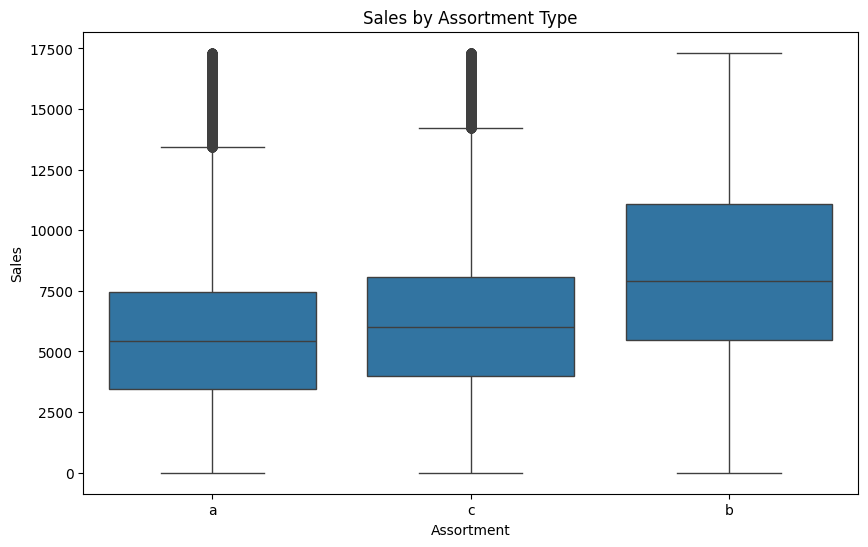

In [17]:
## 9. Assortment type effect on sales
assortment_sales_effect(train_cleaned)

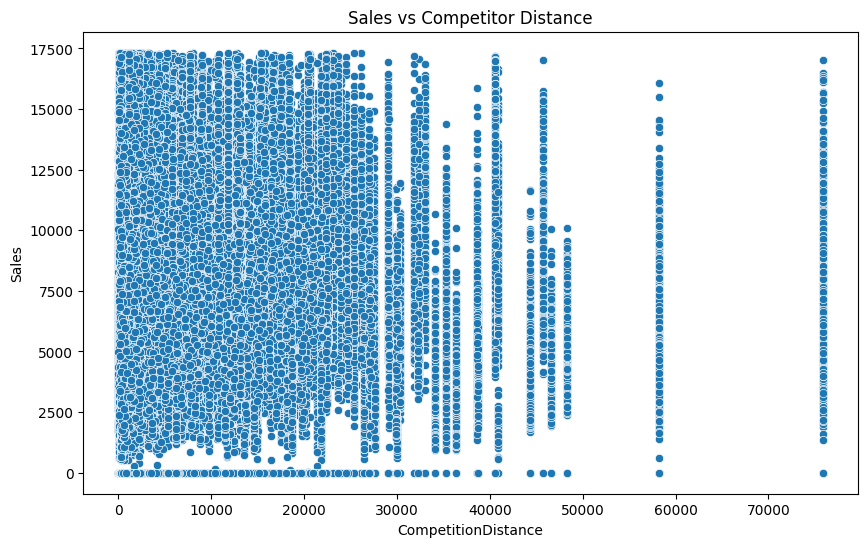

In [18]:
## 10. Competitor distance effect on sales
competitor_distance_effect(train_cleaned)
    

c:\Users\Administrator\Documents\kifiya\Week_4\notebooks\../scripts\EDA_functions.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CompetitionOpened'] = np.where(df['CompetitionDistance'].isna(), 'No Competitor', 'Old Competitor')
c:\Users\Administrator\Documents\kifiya\Week_4\notebooks\../scripts\EDA_functions.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CompetitionOpened'] = np.where(df['CompetitionDistance'].notna() & df['CompetitionDistance'].shift(1).isna(), 'New Competitor', df['

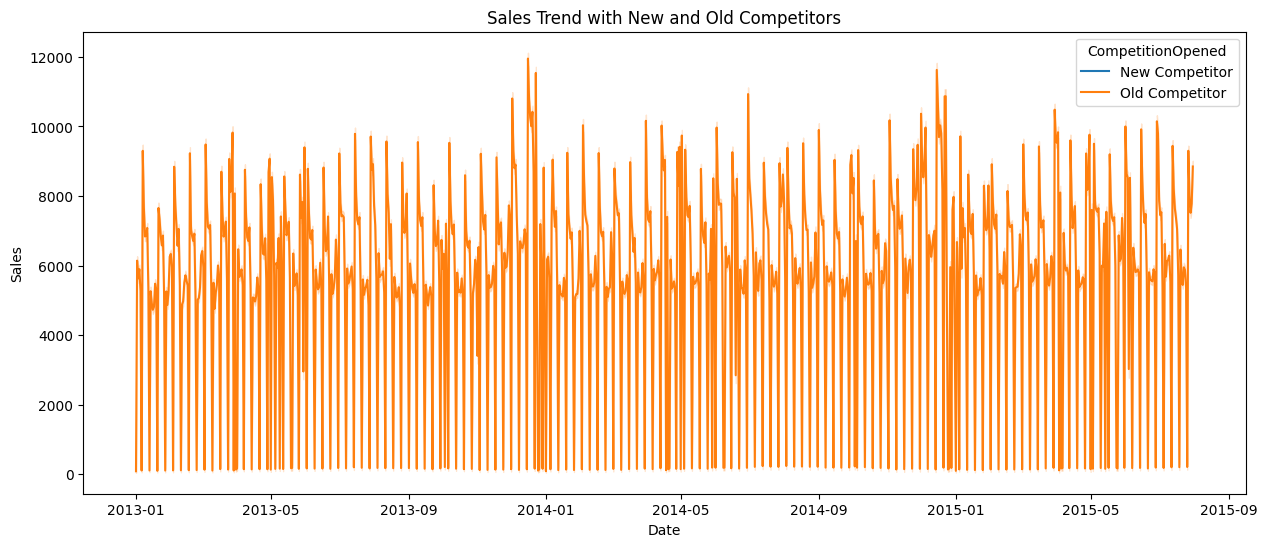

In [19]:
## 11. Opening or reopening of competitors
sales_competition_trend(train_cleaned)
    

c:\Users\Administrator\Documents\kifiya\Week_4\notebooks\../scripts\EDA_functions.py:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('None', np.nan, inplace=True)  # Replace 'None' with NaN
c:\Users\Administrator\Documents\kifiya\Week_4\notebooks\../scripts\EDA_functions.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)  # Fill NaN values with 0
c:\Users\Administrator\Documents\kifiya\Week_4\notebooks\../scripts\EDA_functions.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

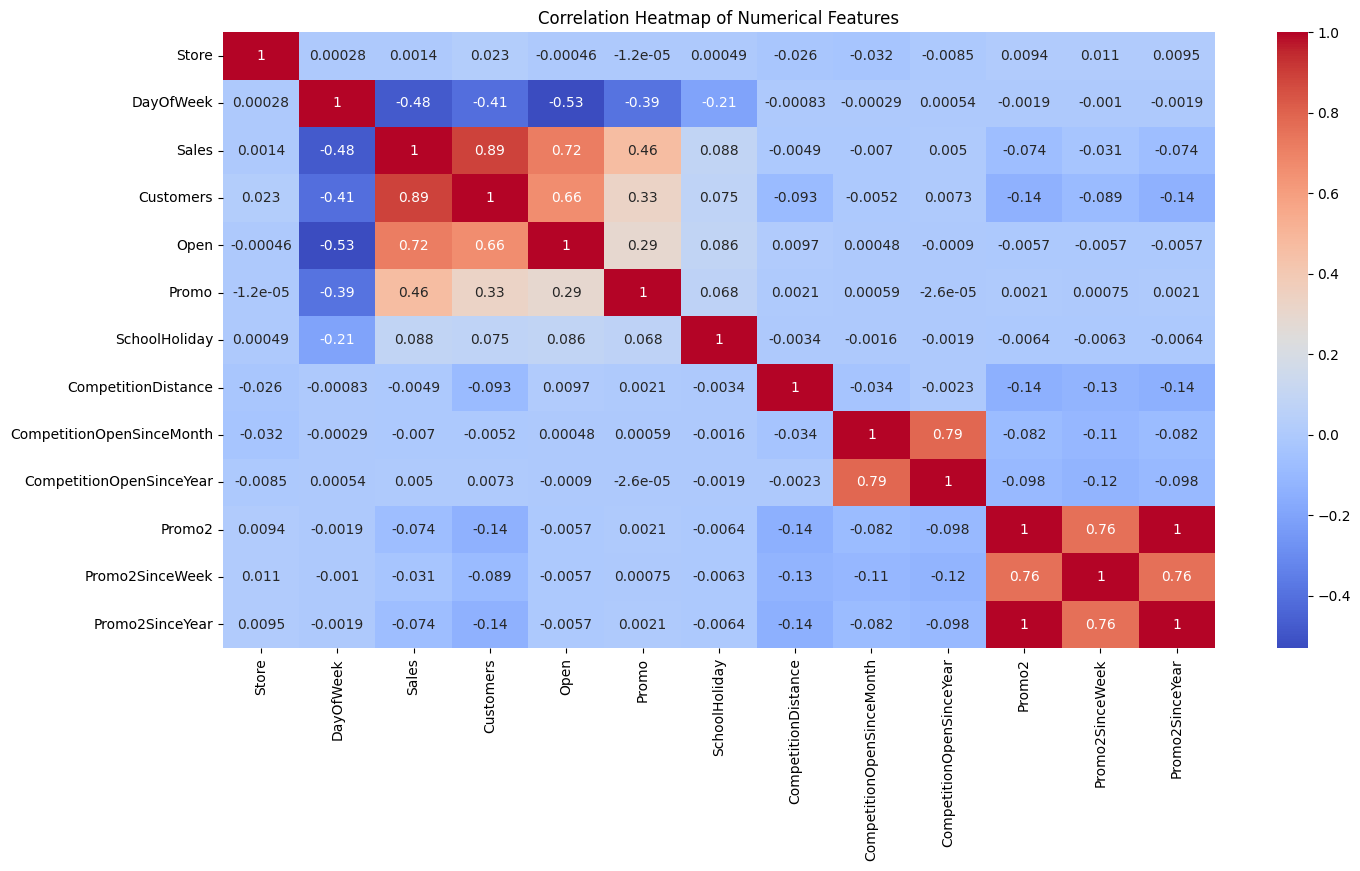

In [20]:
#### Correlation Heatmap ####
correlation_heatmap(train_cleaned)